Author: Alexander Criswell \<<alexander.criswell@ligo.org>\>

This is the final O4+O5 simulation analysis notebook for the Hierarchical Bayesian Post-merger method paper.

In [1]:
## point to my utils/analysis code
hbpmloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/HAYstack/'
## basic imports
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import scipy.stats as st
import matplotlib
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles as mq
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde
from glob import glob
import pandas as pd
import sys 
import os
import pickle
from astropy import cosmology as co
from astropy.units import *
import dill
## Importing the accompanying utility and analysis files
sys.path.append(os.path.abspath(hbpmloc+'hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 12.0
matplotlib.rcParams['ytick.labelsize'] = 12.0
matplotlib.rcParams['axes.labelsize'] = 14.0
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])


Bad key "text.kerning_factor" on line 4 in
/home/alexander/miniconda3/envs/gwenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
post_bandwidth = 0.15
prior_bandwidth = 0.4

In [3]:
## load the sampled empirical relation coefficients
coeffs = pd.read_csv(hbpmloc+'/priors/sampled_empirical_relation_coefficients.tab',sep=' ')
bootstrap = coeffs.to_numpy()

## Preliminaries

In [4]:
## fine grid
fs = np.linspace(1.5,4,200)
Ms = np.linspace(0.8,1.8,200)

In [5]:
## get the Dietrich et al. (2020) multimessenger prior for R_1.6
Rs_mm, Rprior_kernel_mm, R16samples_mm = load_Rprior(hbpmloc+'/priors/R16_prior.txt',return_samples=True,plot=False)

## uniform prior, consider R on [9,15]
Rs = np.linspace(9,15,200)

In [6]:
uniform_Rprior = st.uniform(loc=Rs.min(),scale=(Rs.max()-Rs.min()))

In [7]:
with open(hbpmloc+'/priors/fprior.pickle','rb') as file:
    fprior = dill.load(file)

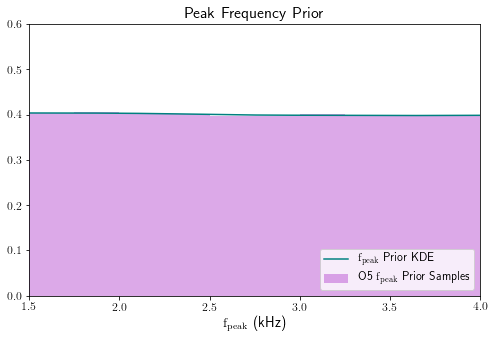

In [8]:
## plot the fpeak prior
plt.figure()
plt.hist(fprior.samples,density=True,alpha=0.5,label='O5 $\mathrm{f_{peak}}$'+' Prior Samples',bins=10)
plt.plot(fs,fprior.pdf(fs),label='$\\mathrm{f_{peak}}$ Prior KDE')
plt.xlabel('$\mathrm{f_{peak}}$ (kHz)')
plt.xlim(1.5,4)
# plt.yticks([])
plt.ylim(0,0.6)
plt.title('Peak Frequency Prior')
plt.legend(loc='lower right')
# plt.savefig('fpeak_prior_forcapstone.jpg',bbox_inches='tight')
plt.show()

In [9]:
fprior_spec = hbpmloc+'/priors/fprior.pickle'

## Analyses

In [10]:
savebase = './paper_data/analysis/O4O5_HLV'
database = './paper_data/bayeswave_fpeak_data/O4O5/'
seed = 170817

## sly4

### O5

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 83/83 [03:48<00:00,  2.75s/it]


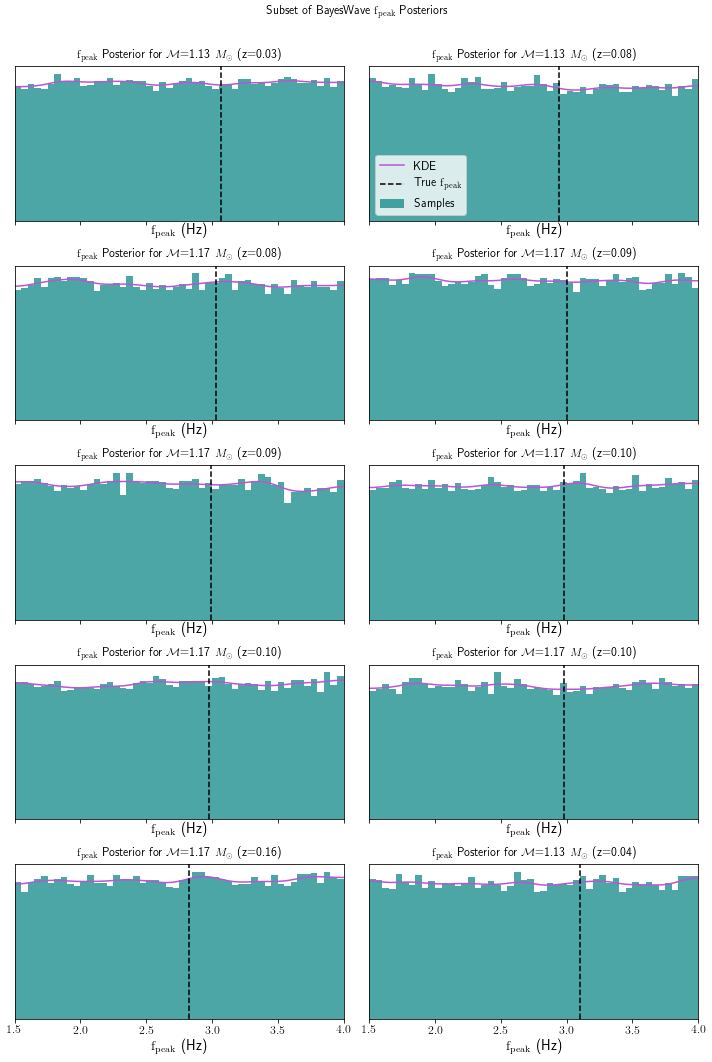

Computing likelihoods...


100%|==========| 83/83 [03:58<00:00,  2.88s/it]


Saving outputs to ././paper_data/analysis/O4O5_HLV_sly4O5/
Saved file to ././paper_data/analysis/O4O5_HLV_sly4O5//posterior_eventdict.pickle
Creating plots...


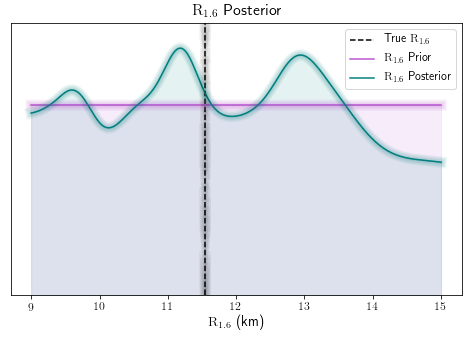

R_1.6 = 11.89 (+2.90,-2.74) km
Done!


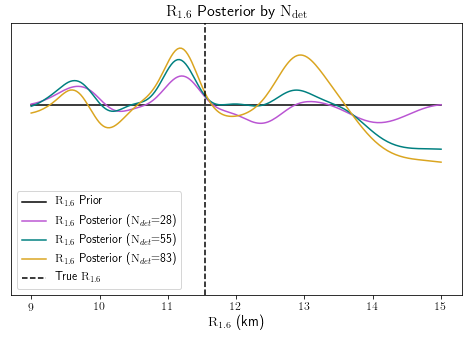

In [11]:
sly4_O5_datadir = database+'/sly4_O5'
Rs_sly4_O5,likes_sly4_O5,post_sly4_O5,stats_sly4_O5,postdict_sly4_O5 = run_analysis(sly4_O5_datadir,
                                                                     fprior_spec,
                                                                'uniform','sly4',
                                                                hbpmloc+'/observing_run_sims/O5_events_updated.csv',
                                                               hbpmloc+'/nr_files/sly4_event_parameters.csv',
                                                               saveto='./'+savebase+'_sly4O5/',bootstrap=bootstrap,
                                                                 prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                        z_adj='known',Mchirp_scaling='snr',
                                                                   ifos='H1,L1,V1',aggregation='sum',seed=seed)

### O4

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 26/26 [01:09<00:00,  2.68s/it]


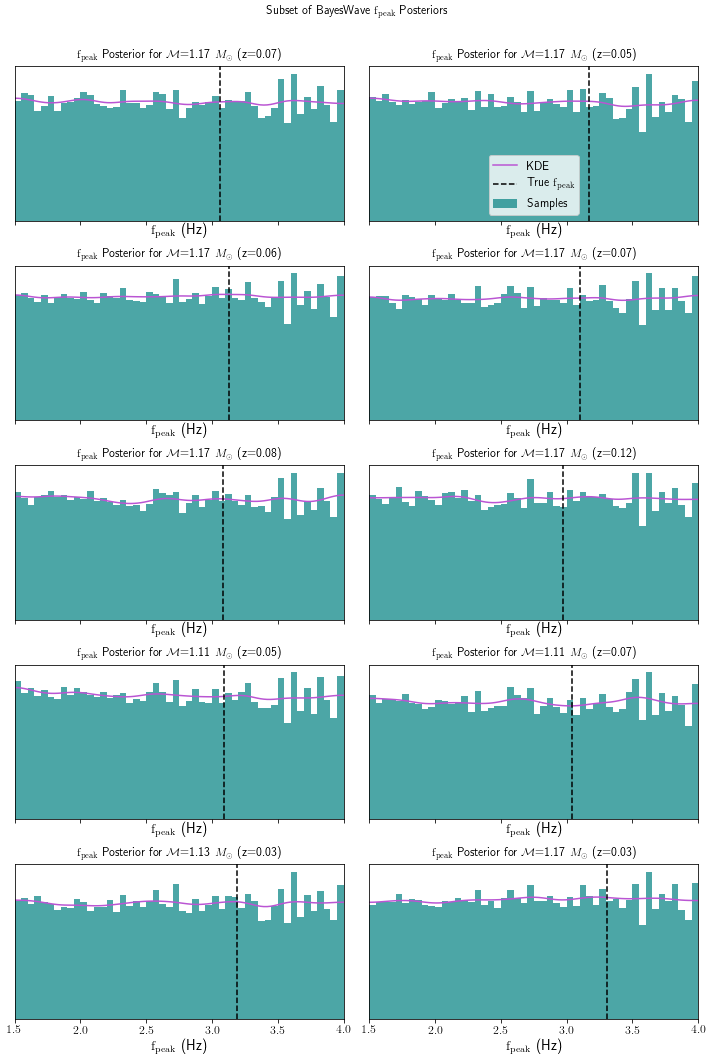

Computing likelihoods...


100%|==========| 26/26 [01:14<00:00,  2.88s/it]


Saving outputs to ././paper_data/analysis/O4O5_HLV_sly4O4/
Saved file to ././paper_data/analysis/O4O5_HLV_sly4O4//posterior_eventdict.pickle
Creating plots...


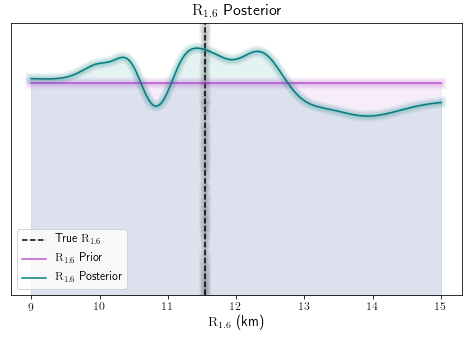

R_1.6 = 11.88 (+2.95,-2.74) km
Done!


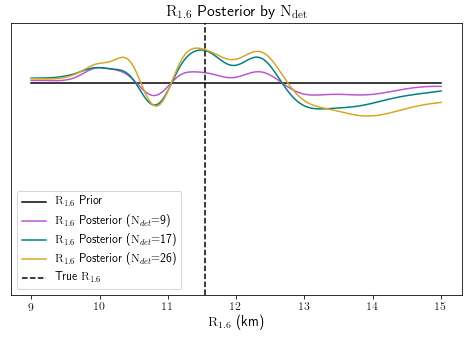

In [12]:
sly4_O4_datadir = database+'/sly4_O4'
Rs_sly4_O4,likes_sly4_O4,post_sly4_O4,stats_sly4_O4,postdict_sly4_O4 = run_analysis(sly4_O4_datadir,
                                                                     fprior_spec,
                                                                'uniform','sly4',
                                                                hbpmloc+'/observing_run_sims/O4_events_updated.csv',
                                                               hbpmloc+'/nr_files/sly4_event_parameters.csv',
                                                               saveto='./'+savebase+'_sly4O4/',bootstrap=bootstrap,
                                                                 prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                        z_adj='known',Mchirp_scaling='snr',
                                                                   ifos='H1,L1,V1',aggregation='sum',seed=seed)

In [13]:
sly4_likes_O4O5 = [*likes_sly4_O4,*likes_sly4_O5]

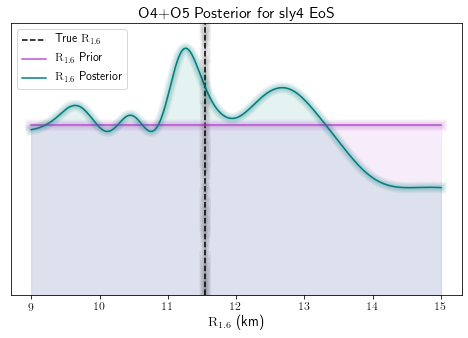

In [14]:
plt.figure()
ax = plt.gca()
# plot_aggregate_posterior_on_ax(Rs,likes_sly4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
#                          title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,sly4_likes_O4O5,uniform_Rprior,Rtrue=11.54,ax=ax,legend_loc='upper left',
                         title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# plot_aggregate_posterior_on_ax(Rs,likes_dd2,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
#                          title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

## SFHX

### O5

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 83/83 [03:47<00:00,  2.75s/it]


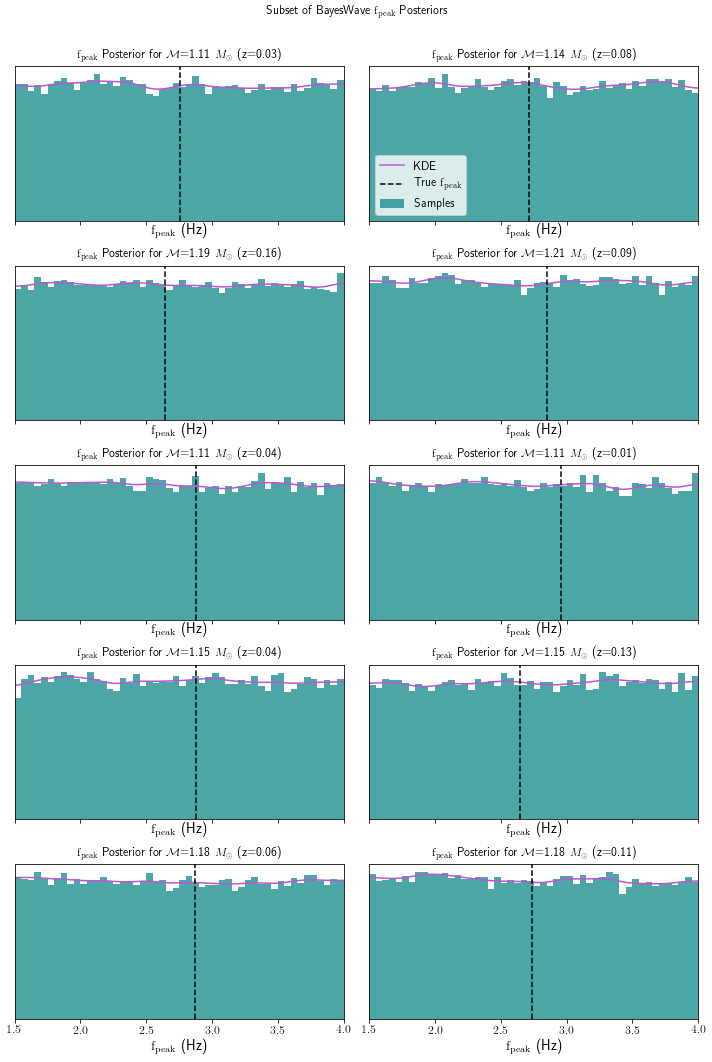

Computing likelihoods...


100%|==========| 83/83 [04:05<00:00,  2.95s/it]


Saving outputs to ././paper_data/analysis/O4O5_HLV_sfhxO5/
Saved file to ././paper_data/analysis/O4O5_HLV_sfhxO5//posterior_eventdict.pickle
Creating plots...


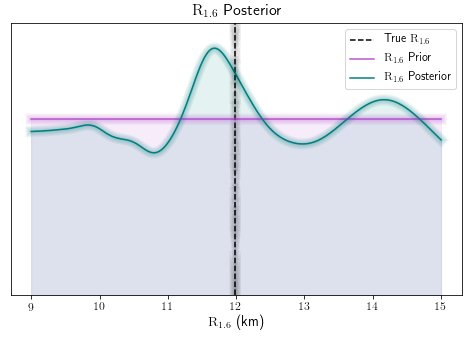

R_1.6 = 12.04 (+2.79,-2.88) km
Done!


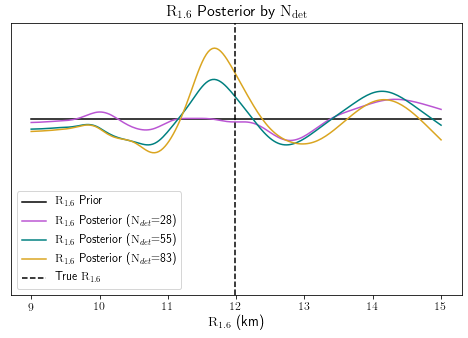

In [15]:
sfhx_O5_datadir = database+'/sfhx_O5'
Rs_sfhx_O5z,likes_sfhx_O5z,post_sfhx_O5z,stats_sfhx_O5z,postdict_sfhx_O5z = run_analysis(sfhx_O5_datadir,
                                                                     fprior_spec,
                                                                'uniform','sfhx',
                                                                hbpmloc+'/observing_run_sims/O5_events_updated.csv',
                                                               hbpmloc+'/nr_files/sfhx_event_parameters.csv',
                                                               saveto='./'+savebase+'_sfhxO5/',bootstrap=bootstrap,
                                                                     prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                        z_adj='known',Mchirp_scaling='snr',
                                                                   ifos='H1,L1,V1',aggregation='sum',seed=seed)

### O4

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 26/26 [01:14<00:00,  2.86s/it]


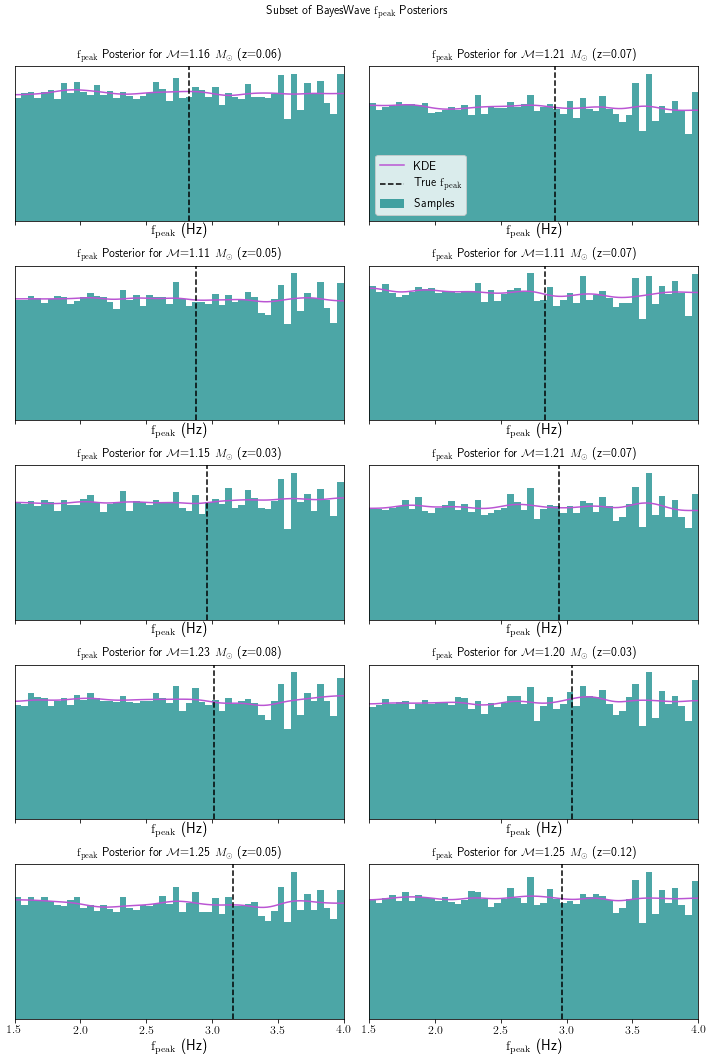

Computing likelihoods...


100%|==========| 26/26 [01:14<00:00,  2.87s/it]


Saving outputs to ././paper_data/analysis/O4O5_HLV_sfhxO4/
Saved file to ././paper_data/analysis/O4O5_HLV_sfhxO4//posterior_eventdict.pickle
Creating plots...


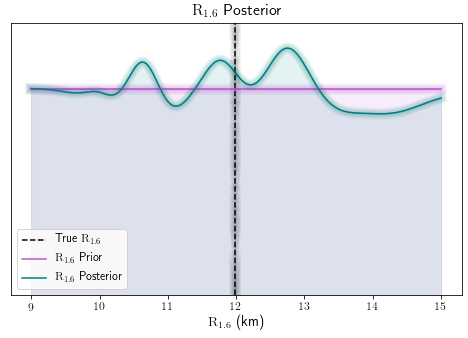

R_1.6 = 11.95 (+2.89,-2.80) km
Done!


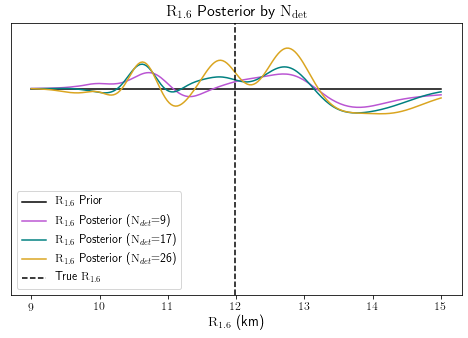

In [16]:
sfhx_O4_datadir = database+'/sfhx_O4'
Rs_sfhx_O4z,likes_sfhx_O4z,post_sfhx_O4z,stats_sfhx_O4z,postdict_sfhx_O4z = run_analysis(sfhx_O4_datadir,
                                                                     fprior_spec,
                                                                'uniform','sfhx',
                                                                hbpmloc+'/observing_run_sims/O4_events_updated.csv',
                                                               hbpmloc+'/nr_files/sfhx_event_parameters.csv',
                                                               saveto='./'+savebase+'_sfhxO4/',bootstrap=bootstrap,
                                                                     prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                        z_adj='known',Mchirp_scaling='snr',
                                                                   ifos='H1,L1,V1',aggregation='sum',seed=seed)

In [17]:
sfhx_likes_O4O5z = [*likes_sfhx_O4z,*likes_sfhx_O5z]

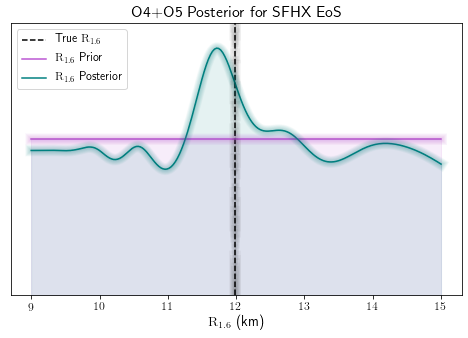

In [18]:
plt.figure()
ax = plt.gca()
# plot_aggregate_posterior_on_ax(Rs,likes_sly4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
#                          title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,sfhx_likes_O4O5z,uniform_Rprior,Rtrue=11.98,ax=ax,legend_loc='upper left',
                         title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# plot_aggregate_posterior_on_ax(Rs,likes_dd2,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
#                          title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

## DD2

### O5

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 83/83 [03:57<00:00,  2.86s/it]


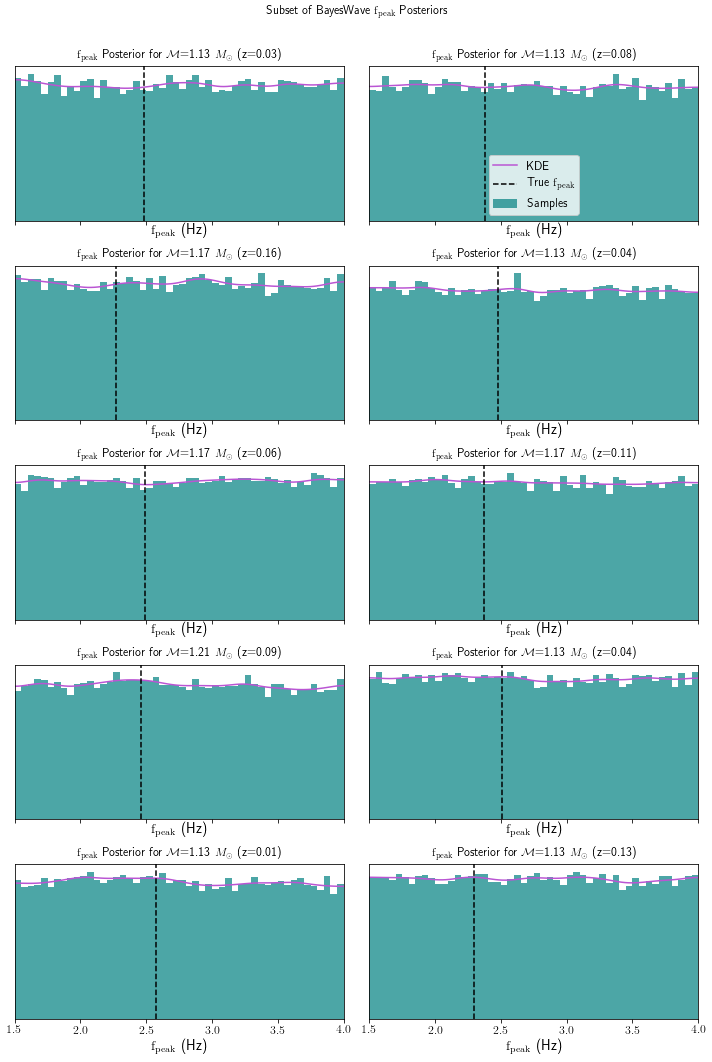

Computing likelihoods...


100%|==========| 83/83 [04:05<00:00,  2.96s/it]


Saving outputs to ././paper_data/analysis/O4O5_HLV_dd2O5/
Saved file to ././paper_data/analysis/O4O5_HLV_dd2O5//posterior_eventdict.pickle
Creating plots...


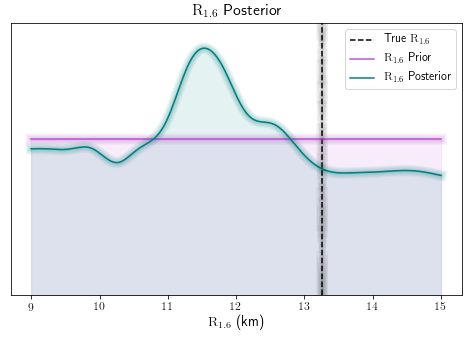

R_1.6 = 11.88 (+2.93,-2.72) km
Done!


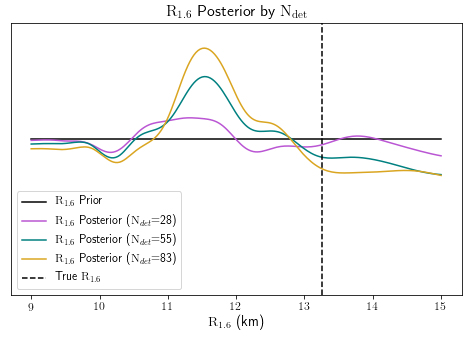

In [19]:
dd2_O5_datadir = database+'/dd2_O5'
Rs_dd2_O5z,likes_dd2_O5z,post_dd2_O5z,stats_dd2_O5z,postdict_dd2_O5z = run_analysis(dd2_O5_datadir,
                                                                     fprior_spec,
                                                                'uniform','dd2',
                                                                hbpmloc+'/observing_run_sims/O5_events_updated.csv',
                                                               hbpmloc+'/nr_files/dd2_event_parameters.csv',
                                                               saveto='./'+savebase+'_dd2O5/',bootstrap=bootstrap,
                                                                     prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                        z_adj='known',Mchirp_scaling='snr',
                                                                   ifos='H1,L1,V1',aggregation='sum',seed=seed)

### O4

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 26/26 [01:12<00:00,  2.79s/it]


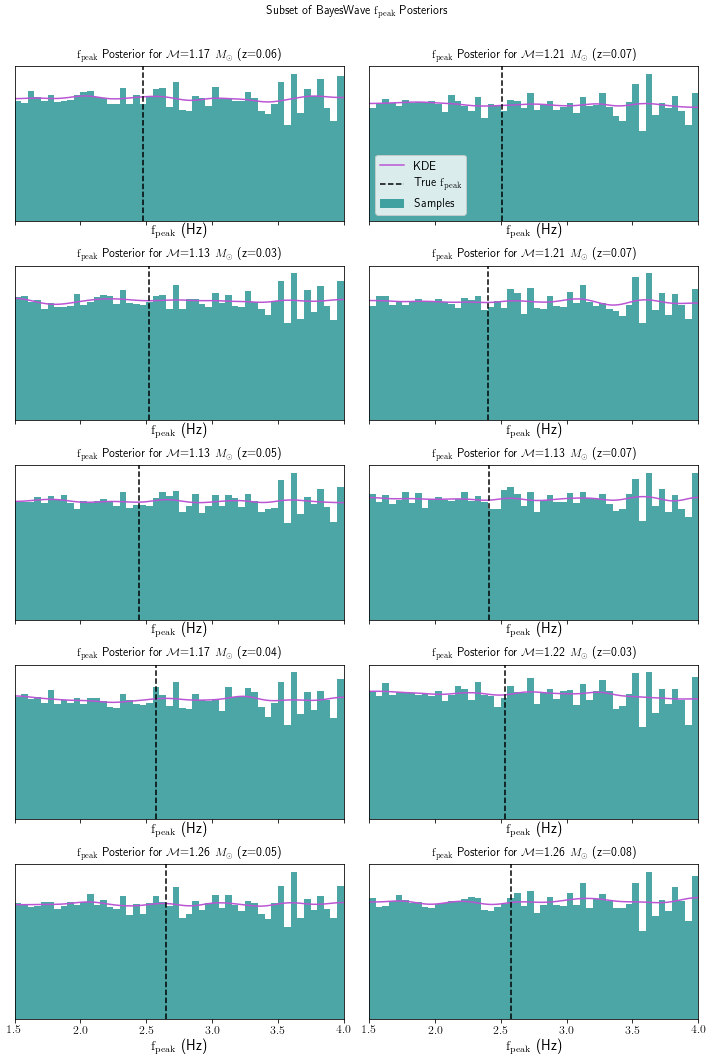

Computing likelihoods...


100%|==========| 26/26 [01:17<00:00,  2.97s/it]


Saving outputs to ././paper_data/analysis/O4O5_HLV_dd2O4/
Saved file to ././paper_data/analysis/O4O5_HLV_dd2O4//posterior_eventdict.pickle
Creating plots...


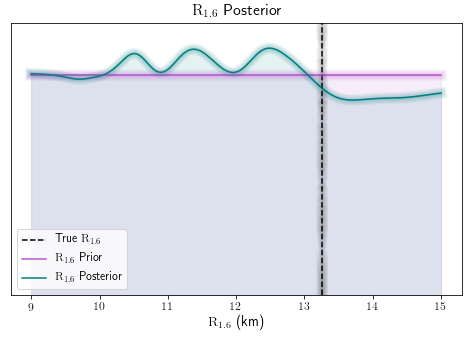

R_1.6 = 11.93 (+2.91,-2.78) km
Done!


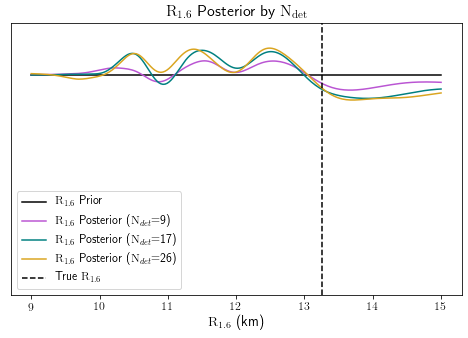

In [20]:
dd2_O4_datadir = database+'/dd2_O4'
Rs_dd2_O4z,likes_dd2_O4z,post_dd2_O4z,stats_dd2_O4z,postdict_dd2_O4z = run_analysis(dd2_O4_datadir,
                                                                     fprior_spec,
                                                                'uniform','dd2',
                                                                hbpmloc+'/observing_run_sims/O4_events_updated.csv',
                                                               hbpmloc+'/nr_files/dd2_event_parameters.csv',
                                                               saveto='./'+savebase+'_dd2O4/',bootstrap=bootstrap,
                                                                     prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                        z_adj='known',Mchirp_scaling='snr',
                                                                   ifos='H1,L1,V1',aggregation='sum',seed=seed)

In [21]:
dd2_likes_O4O5z = [*likes_dd2_O4z,*likes_dd2_O5z]

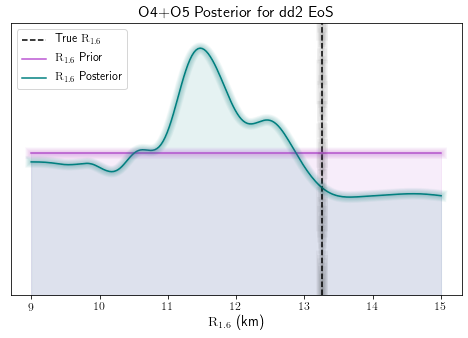

In [22]:
plt.figure()
ax = plt.gca()
# plot_aggregate_posterior_on_ax(Rs,likes_sly4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
#                          title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,dd2_likes_O4O5z,uniform_Rprior,Rtrue=13.26,ax=ax,legend_loc='upper left',
                         title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# plot_aggregate_posterior_on_ax(Rs,likes_dd2,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
#                          title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

## All together now!

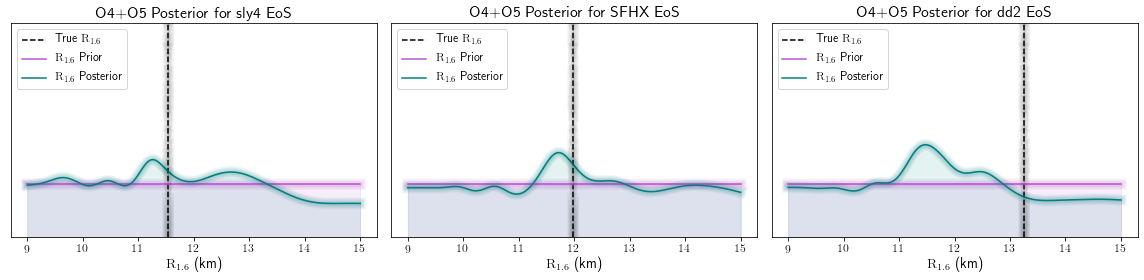

In [23]:
## plot all
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4),sharey=True)
plot_aggregate_posterior_on_ax(Rs,sly4_likes_O4O5,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
                         title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,sfhx_likes_O4O5z,uniform_Rprior,Rtrue=11.98,ax=ax2,legend_loc='upper left',
                         title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,dd2_likes_O4O5z,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
                         title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
ax1.set_ylim(0,0.02)
plt.tight_layout()
# plt.suptitle('O4+O5')
# plt.savefig('../paper/figures/O4O5_allEoS_uniformprior_3panel.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_uniformprior_3panel.pdf',bbox_inches='tight')
plt.show()

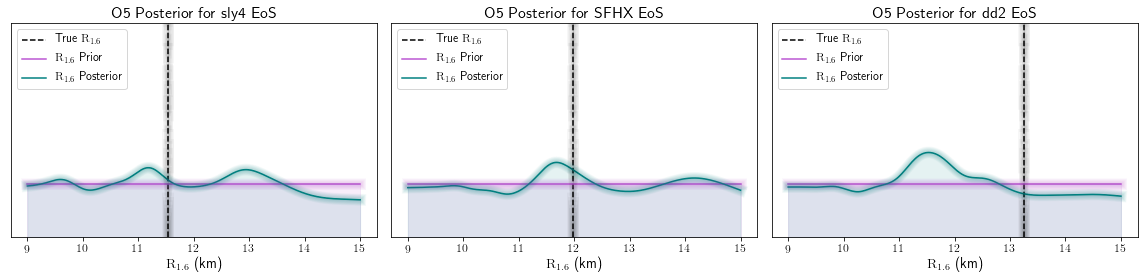

In [24]:
## plot all
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4),sharey=True)
plot_aggregate_posterior_on_ax(Rs,likes_sly4_O5,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
                         title='O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_sfhx_O5z,uniform_Rprior,Rtrue=11.98,ax=ax2,legend_loc='upper left',
                         title='O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_dd2_O5z,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
                         title='O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
ax1.set_ylim(0,0.02)
plt.tight_layout()
# plt.suptitle('O5 Only')
# plt.savefig('../paper/figures/O4O5_allEoS_uniformprior_3panel.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_uniformprior_3panel.pdf',bbox_inches='tight')
plt.show()

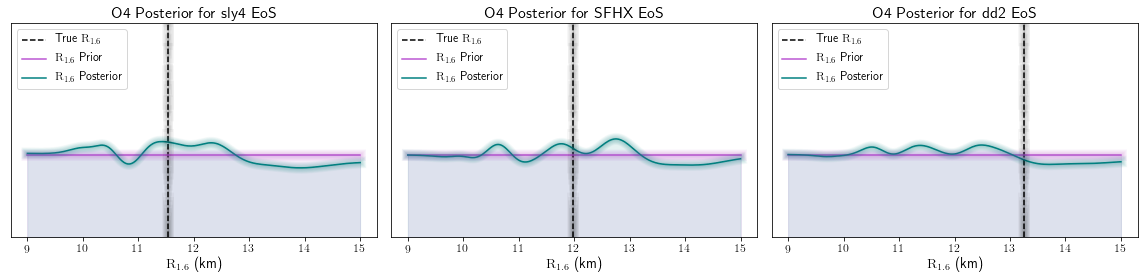

In [25]:
## plot all
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4),sharey=True)
plot_aggregate_posterior_on_ax(Rs,likes_sly4_O4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
                         title='O4 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_sfhx_O4z,uniform_Rprior,Rtrue=11.98,ax=ax2,legend_loc='upper left',
                         title='O4 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_dd2_O4z,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
                         title='O4 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
ax1.set_ylim(0,0.013)
plt.tight_layout()
# plt.suptitle('O4 Only')
# plt.savefig('../paper/figures/O4O5_allEoS_uniformprior_3panel.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_uniformprior_3panel.pdf',bbox_inches='tight')
plt.show()

In [26]:
## load back in & compare
dictdict = {'sfhx':{},'dd2':{},'sly4':{}}
resultspath = '/mnt/c/Users/Alexander/Documents/LIGO/PM/hbpm_paper/paper_data/analysis/'
eoss = ['sfhx','dd2','sly4']
runs = ['O4','O5']
# dd2O4_path = resultspath+'O4full_dd2_out/posterior_eventdict.pickle'
base = 'O4O5_HLV_'
for eos in eoss:
    for run in runs:
        name = base+eos+run+'/posterior_eventdict.pickle'
        dictdict[eos][run] = load_posterior_pickle(resultspath+name)
        Ri, Rpi, likelisti = unpack_posterior_dict(dictdict[eos][run])
        dictdict[eos][run]['likes'] = likelisti
likes_dd2_loaded = [*dictdict['dd2']['O4']['likes'],*dictdict['dd2']['O5']['likes']]
likes_sfhx_loaded = [*dictdict['sfhx']['O4']['likes'],*dictdict['sfhx']['O5']['likes']]
likes_sly4_loaded = [*dictdict['sly4']['O4']['likes'],*dictdict['sly4']['O5']['likes']]

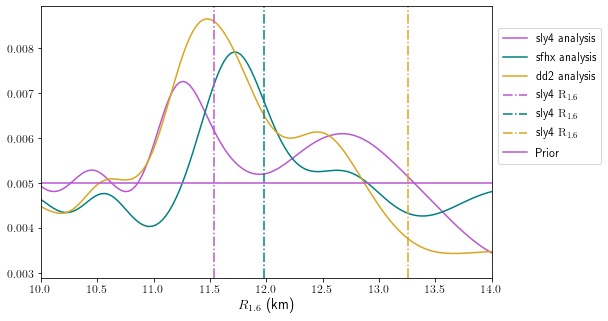

In [27]:
Rs_fine = np.linspace(9,15,500)
plt.figure()
plt.plot(Rs,get_posterior(Rs,get_aggregate_likelihood(likes_sly4_loaded),uniform_Rprior),
         label='sly4 analysis',color='mediumorchid')
plt.plot(Rs,get_posterior(Rs,get_aggregate_likelihood(likes_sfhx_loaded),uniform_Rprior),
         label='sfhx analysis',color='teal')
plt.plot(Rs,get_posterior(Rs,get_aggregate_likelihood(likes_dd2_loaded),uniform_Rprior),
         label='dd2 analysis',color='goldenrod')
plt.axvline(11.54,color='mediumorchid',ls='-.',label='sly4 $\mathrm{R_{1.6}}$')
plt.axvline(11.98,color='teal',ls='-.',label='sly4 $\mathrm{R_{1.6}}$')
plt.axvline(13.26,color='goldenrod',ls='-.',label='sly4 $\mathrm{R_{1.6}}$')
plt.axhline(0.005,label='Prior')
# plt.ylim(0,0.01)
plt.xlabel('$R_{1.6}$ (km)')
plt.xlim(10,14)
plt.legend(bbox_to_anchor=(1,0.4))
plt.show()